## 2.2. Problem Statement: Machine Learning 2 

### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#The boston variable is a dictionary and its key values are as follows: 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#findig description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#no of homes and features an be determined from the shape
df.shape

(506, 13)

In [8]:
#from key values we can determine the features
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#assigning feature names to the column
df.columns = boston.feature_names

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df['Price'] = boston.target #Adding target values to the data as Price column

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\Parth Samal\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Parth Samal\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Parth Samal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Parth Samal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


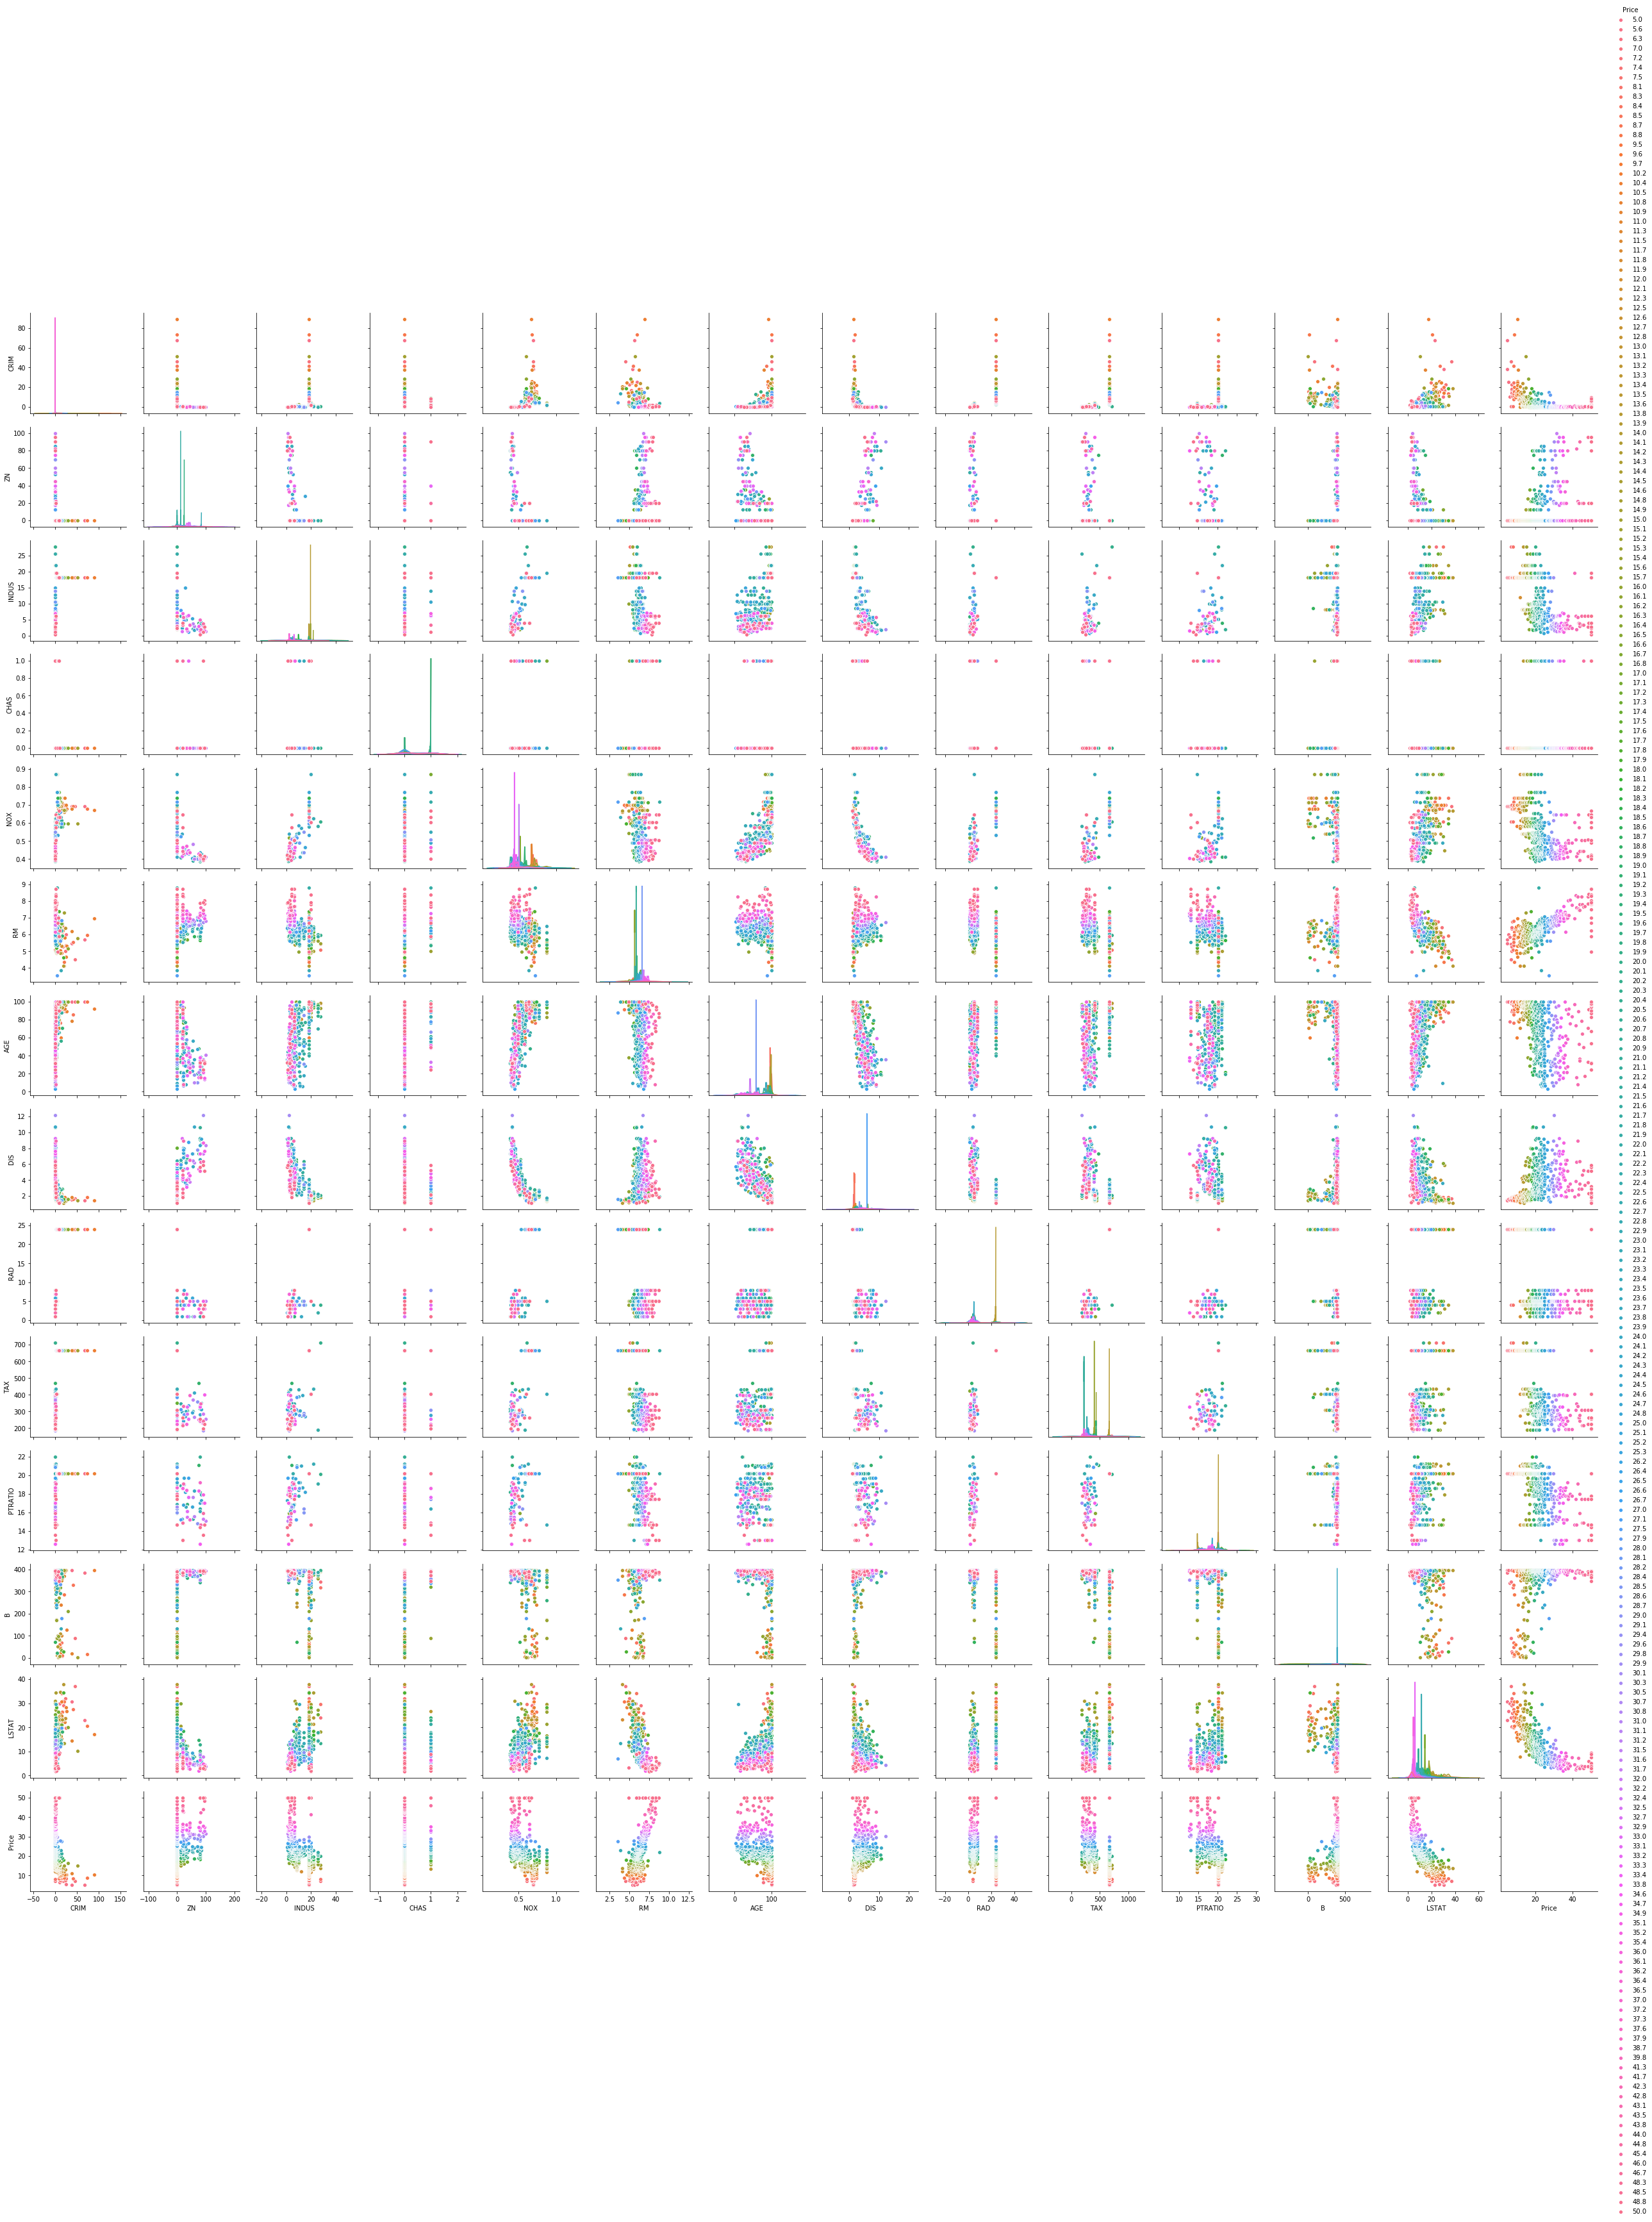

In [16]:
#Using pairplot to see compare relationships
import seaborn as sns
sns.pairplot(df, hue='Price')

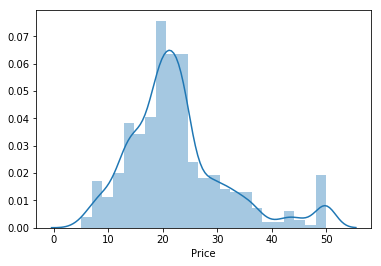

In [17]:
sns.distplot(df['Price']) 

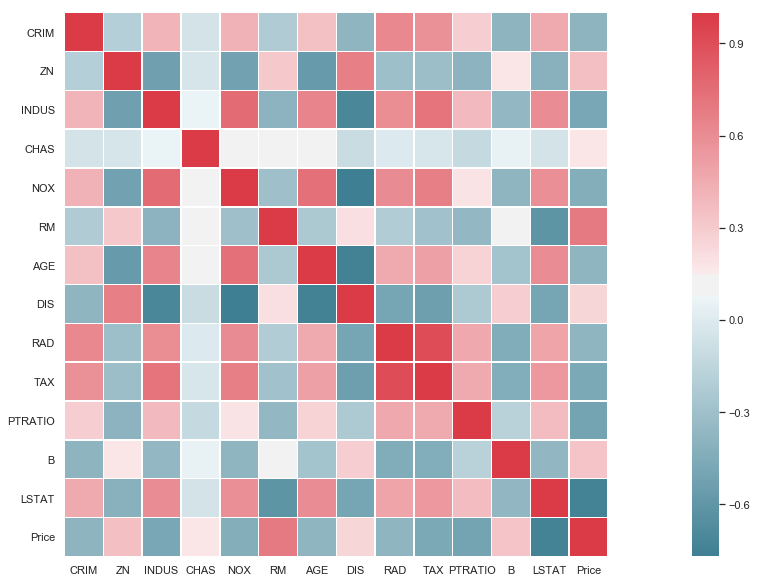

In [18]:
#Correlation Matrix
sns.set(style="white")
df_corr= df[:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio
#RAD and TAX are highly co-related.
#Price negatively corelated with LSTAT(Strong),PTRATIO(Strong),TAX(high), INDUS(High), CRIM(Highly) and 
#NOX highly corelated with RM.
#Also Price positively corelated with RM(High), ZN(High), CHAS(Medium), DIS(MEDIUM) & B(Medium)

### Checking for null entries

In [19]:
df.isnull().values.any()

False

### Train and Test

In [21]:
X = df.drop('Price', axis = 1) #All features except Price ( predictor values )
y= df['Price'] #Boston housing price ( target value )

In [22]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)

### Creating and training the model

In [23]:
from sklearn.linear_model import LinearRegression #Imports LinearRegression
model = LinearRegression() #Creating an instance of LinearRegression
model.fit(X_train, y_train) #Fitting the created instance of the LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(model.intercept_)

37.91248700975083


In [25]:
print(model.coef_)

[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


### Predicting Price using Test Data

In [26]:
y_pred = model.predict(X_test)

In [28]:
y_pred.shape

(102,)

### Evaluating the model

In [29]:
#Calculating Mean Squared Error
mse = sklearn.metrics.mean_squared_error(y_test, y_pred) #Mean Squared Error: To check the level of error of a model
print(mse)

20.869292183770522


In [30]:
#Calculating Root Mean Squared Error
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

4.568292042303176


In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7334492147453113